In [6]:
""" Para cargar desde el compu c: 
from os import listdir
from os.path import isfile, join
def ls(ruta = '.'):
    return [arch for arch in listdir(ruta) if isfile(join(ruta, arch))]

os.chdir("/home/valentina/my_git/Mineriadatos")
at = pd.read_csv('atributos.csv')
os.chdir("/home/valentina/my_git/Mineriadatos/UTKFace")

print(os.getcwd())
archivos=ls()
len(archivos)"""

' Para cargar desde el compu c: \ndef ls(ruta = \'.\'):\n    return [arch for arch in listdir(ruta) if isfile(join(ruta, arch))]\n\nos.chdir("/home/valentina/my_git/Mineriadatos")\nat = pd.read_csv(\'atributos.csv\')\nos.chdir("/home/valentina/my_git/Mineriadatos/UTKFace")\n\narchivos=ls()\nlen(archivos)'

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [13]:
at = pd.read_csv('/content/drive/My Drive/Mineria/atributos.csv')
os.chdir('/content/drive/My Drive/Mineria/UTKFace')
at

,Id,edad,mujer,raza_0a4
0,1_0_0_20161219140623097.jpg.chip.jpg,1,0,0
1,1_0_0_20161219140627985.jpg.chip.jpg,1,0,0
2,1_0_0_20161219140642920.jpg.chip.jpg,1,0,0
3,1_0_0_20161219154018476.jpg.chip.jpg,1,0,0
4,1_0_0_20161219154556757.jpg.chip.jpg,1,0,0
...,...,...,...,...
23700,99_1_0_20170120134718759.jpg.chip.jpg,99,1,0
23701,99_1_0_20170120221920654.jpg.chip.jpg,99,1,0
23702,99_1_1_20170120134639935.jpg.chip.jpg,99,1,1
23703,99_1_2_20170110182418864.jpg.chip.jpg,99,1,2


1_0_0_20161219193326339.jpg.chip.jpg

La imagen tiene forma:  (200, 200, 3) 

[[[237 218 201]
  [237 216 199]
  [236 215 198]
  ...
  [230 228 231]
  [235 231 232]
  [239 233 235]]

 [[238 219 202]
  [238 217 200]
  [236 215 198]
  ...
  [230 228 229]
  [235 231 232]
  [239 233 235]]

 [[238 219 202]
  [238 217 200]
  [236 215 198]
  ...
  [234 230 231]
  [237 231 233]
  [239 233 235]]

 ...

 [[233 187 163]
  [229 183 159]
  [234 188 165]
  ...
  [204 153 132]
  [206 155 134]
  [206 158 136]]

 [[232 186 162]
  [229 183 159]
  [229 183 160]
  ...
  [201 151 128]
  [204 154 131]
  [205 155 132]]

 [[228 182 158]
  [229 183 159]
  [223 177 154]
  ...
  [200 148 126]
  [202 152 129]
  [203 153 130]]]


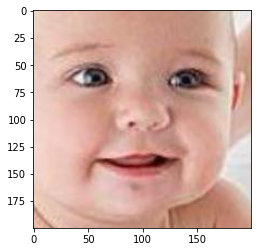

In [15]:
i=20
print(at.Id[i])
image=io.imread(at.Id[i])
plt.imshow(image)

Idata=np.array(image)
print("\nLa imagen tiene forma: ",Idata.shape,"\n")
print(Idata)

In [0]:
X=np.zeros((at.shape[0],200,200,3))

In [0]:
for i in range(2000,2010): 
    x=at.Id[i]
    image=io.imread(x)
    print(image.shape)

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
